# ANÁLISIS DE CORRESPONDENCIAS SIMPLE

## Realizado por: Pablo Sánchez Cabrera

Se cargan las librerías y los datos

In [15]:
import os
import pandas as pd
import numpy as np
from fanalysis.ca import CA
import matplotlib.pyplot as plt

In [16]:
housetasks = pd.read_csv('../data/housetasks.csv', header='infer', index_col=0)
housetasks

,Wife,Alternating,Husband,Jointly
Task,,,,
Laundry,156,14,2,4
Main_meal,124,20,5,4
Dinner,77,11,7,13
Breakfast,82,36,15,7
Tidying,53,11,1,57
Dishes,32,24,4,53
Shopping,33,23,9,55
Official,12,46,23,15
Driving,10,51,75,3


Se realiza el modelo teniendo en cuenta 3 factores. A falta de confirmar por `Scree plot` y `varianza explicada` se eligen 3 dimensiones por el usuario, para explicar un total de  4 categorías.

In [14]:
acs = CA(n_components=3, row_labels=housetasks.index, col_labels=housetasks.columns)  # definición del modelo
acs.fit(housetasks.to_numpy()) # ajuste del modelo de anális de correspondencias simple

CA(col_labels=Index(['Wife', 'Alternating', 'Husband', 'Jointly'], dtype='object'),
   n_components=3,
   row_labels=Index(['Laundry', 'Main_meal', 'Dinner', 'Breakfast', 'Tidying', 'Dishes',
       'Shopping', 'Official', 'Driving', 'Finances', 'Insurance', 'Repairs',
       'Holidays'],
      dtype='object', name='Task'))

Destacar que para poder utilizar esta librería es necesario trabajar los datos en formato matriz. Por ello, se aplica la conversión del dataframe a matriz con el método `to_numpy`

Se estudia a continuación la importancia de las dimensiones: 
- `Scree plot`

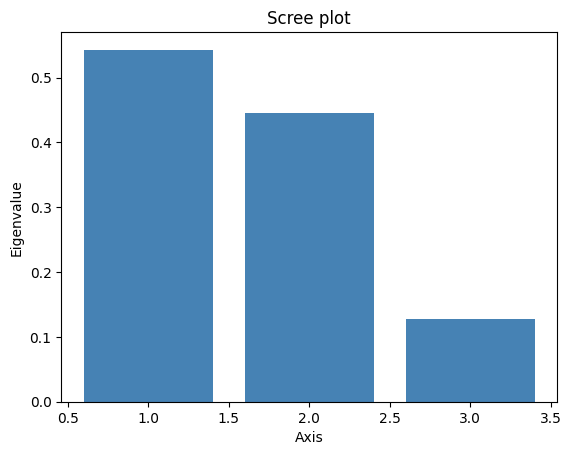

In [22]:
acs.plot_eigenvalues()

- `Varianza Explicada`

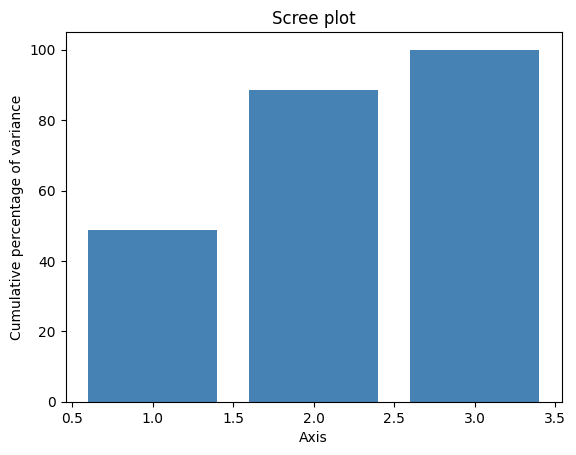

In [23]:
acs.plot_eigenvalues('cumulative')

Se puede observar que con las dos primeras dimensiones, se recoge más del 88% de la varianza total

`Perfiles fila`

- `Coordenadas`

In [25]:
pd.DataFrame(acs.row_coord_, columns=['Dim_1', 'Dim_2', 'Dim_3'], index=housetasks.index)

,Dim_1,Dim_2,Dim_3
Task,,,
Laundry,-0.991837,-0.495322,-0.316729
Main_meal,-0.875585,-0.490109,-0.164065
Dinner,-0.692574,-0.308104,-0.207414
Breakfast,-0.508600,-0.452804,0.220405
Tidying,-0.393808,0.434344,-0.094214
Dishes,-0.188964,0.441966,0.266949
Shopping,-0.117681,0.403317,0.202615
Official,0.226632,-0.253613,0.923364
Driving,0.741770,-0.653414,0.544458


`Contribuciones relativas - cos2`

In [26]:
pd.DataFrame(acs.row_cos2_, columns=['Dim_1', 'Dim_2', 'Dim_3'], index=housetasks.index)

,Dim_1,Dim_2,Dim_3
Task,,,
Laundry,0.739987,0.184552,0.075460
Main_meal,0.741603,0.232359,0.026038
Dinner,0.776640,0.153703,0.069657
Breakfast,0.504943,0.400230,0.094827
Tidying,0.439812,0.535015,0.025172
Dishes,0.118118,0.646153,0.235730
Shopping,0.063654,0.747655,0.188691
Official,0.053045,0.066426,0.880529
Driving,0.432019,0.335229,0.232752


Como puede verse, los individuos están bien representados en las dos primeras dimensiones. 

Dishes, Shopping, Finances and Holidays destacan por tener una mejor calidad de representaicón en la segunda dimensión

`Calidad de representación`

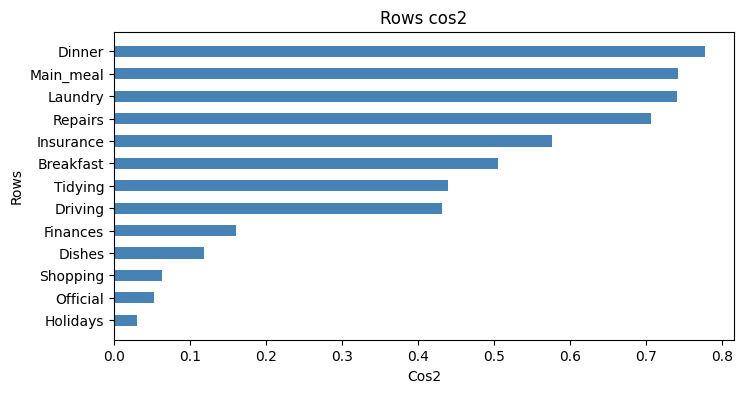

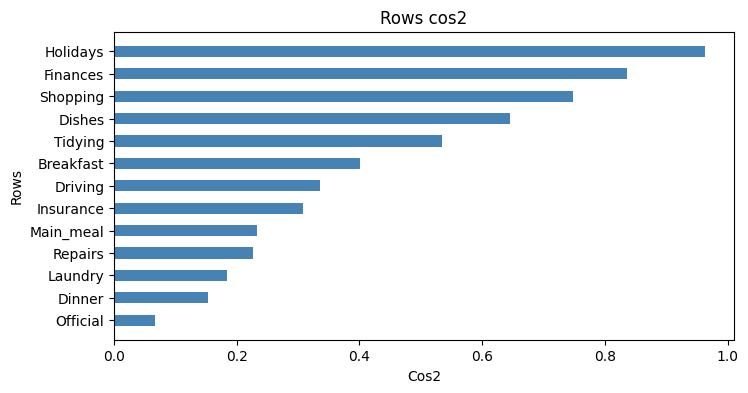

In [27]:
acs.plot_row_cos2(num_axis=1, figsize=(8,4))
acs.plot_row_cos2(num_axis=2, figsize=(8,4))

`Contribuciones a las dimensiones`

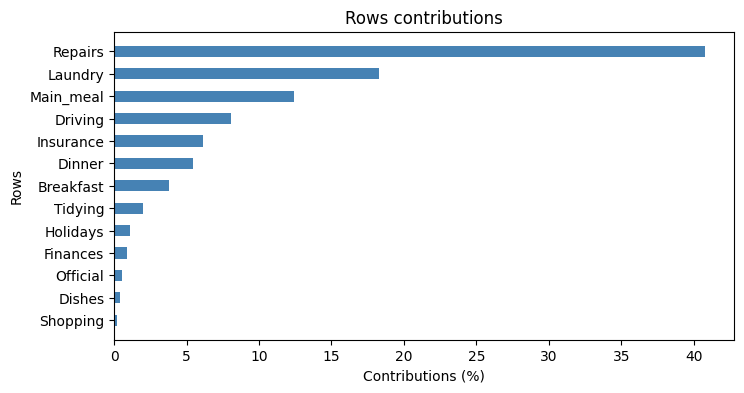

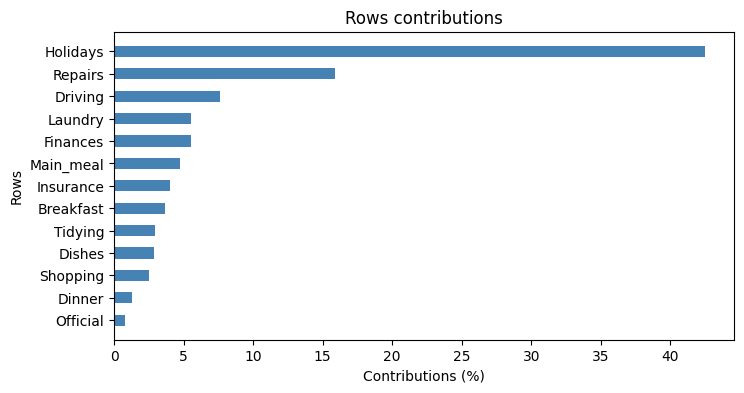

In [29]:
acs.plot_row_contrib(num_axis=1, figsize=(8,4))
acs.plot_row_contrib(num_axis=2, figsize=(8,4))

`Perfiles Columna`

- `Coordenadas`

In [31]:
pd.DataFrame(acs.col_coord_, columns=['Dim_1', 'Dim_2', 'Dim_3'], index=housetasks.columns)

,Dim_1,Dim_2,Dim_3
Wife,-0.837622,-0.365221,-0.199911
Alternating,-0.062185,-0.291594,0.848589
Husband,1.160918,-0.601920,-0.188859
Jointly,0.149426,1.026579,-0.046443


`Contribuciones relativas - cos2`

In [32]:
pd.DataFrame(acs.col_cos2_, columns=['Dim_1', 'Dim_2', 'Dim_3'], index=housetasks.columns)

,Dim_1,Dim_2,Dim_3
Wife,0.801876,0.152448,0.045676
Alternating,0.004780,0.105102,0.890119
Husband,0.772026,0.207542,0.020432
Jointly,0.020706,0.977294,0.002000


Wife y Husband están correctamente representadas en la primera dimensión mientras que Jointly en la segunda.

Sin embargo, Alternating solo está bine representada en la tercera dimensión -> no utilizada para representar los datos

`Calidad de representación`

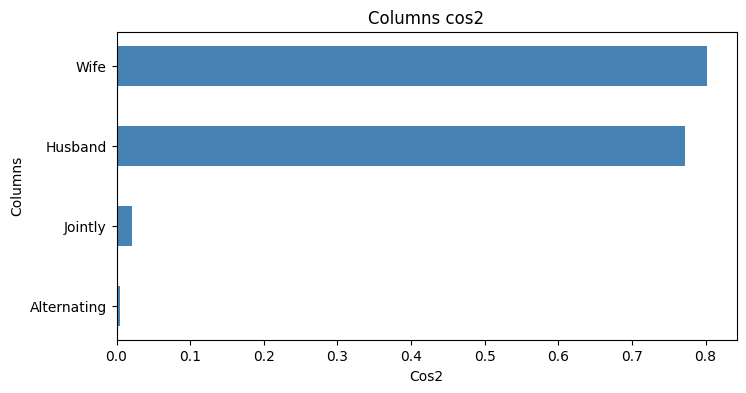

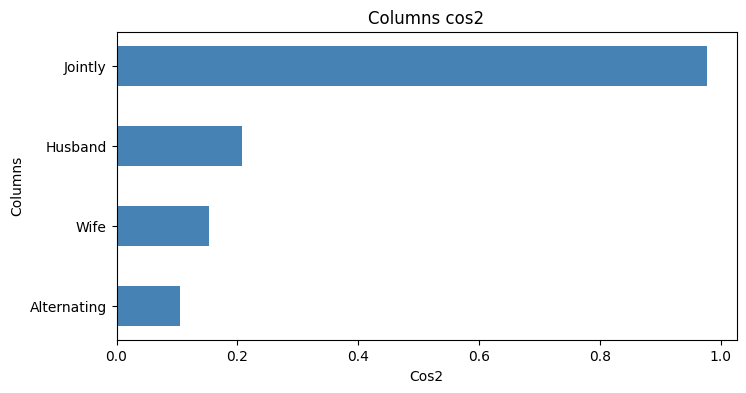

In [33]:
acs.plot_col_cos2(num_axis=1, figsize=(8,4))
acs.plot_col_cos2(num_axis=2, figsize=(8,4))

`Contribuciones a las dimensiones`

In [34]:
pd.DataFrame(acs.col_contrib_, columns=['Dim_1', 'Dim_2', 'Dim_3'], index=housetasks.columns)

,Dim_1,Dim_2,Dim_3
Wife,44.462018,10.312237,10.822075
Alternating,0.103739,2.782794,82.549246
Husband,54.233879,17.786612,6.133179
Jointly,1.200364,69.118357,0.495499


De igual forma, Alternating solo está bine representada en la tercera dimensión

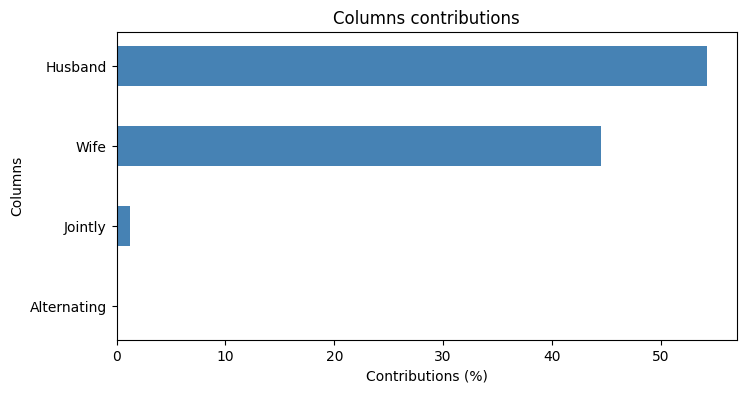

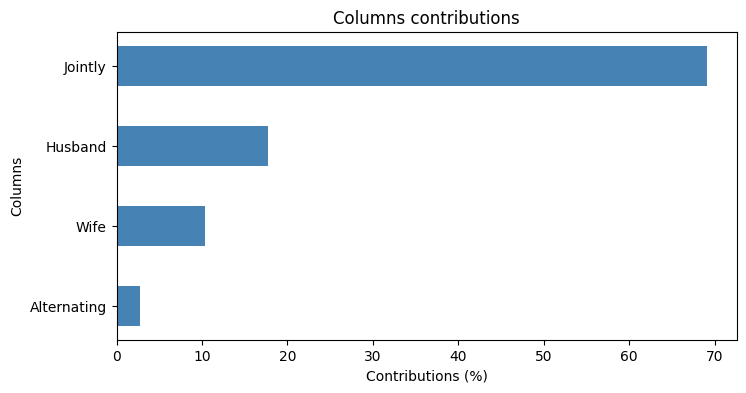

In [35]:
acs.plot_col_contrib(num_axis=1, figsize=(8,4))
acs.plot_col_contrib(num_axis=2, figsize=(8,4))

`Biplot - visualización perfil fila y columna`

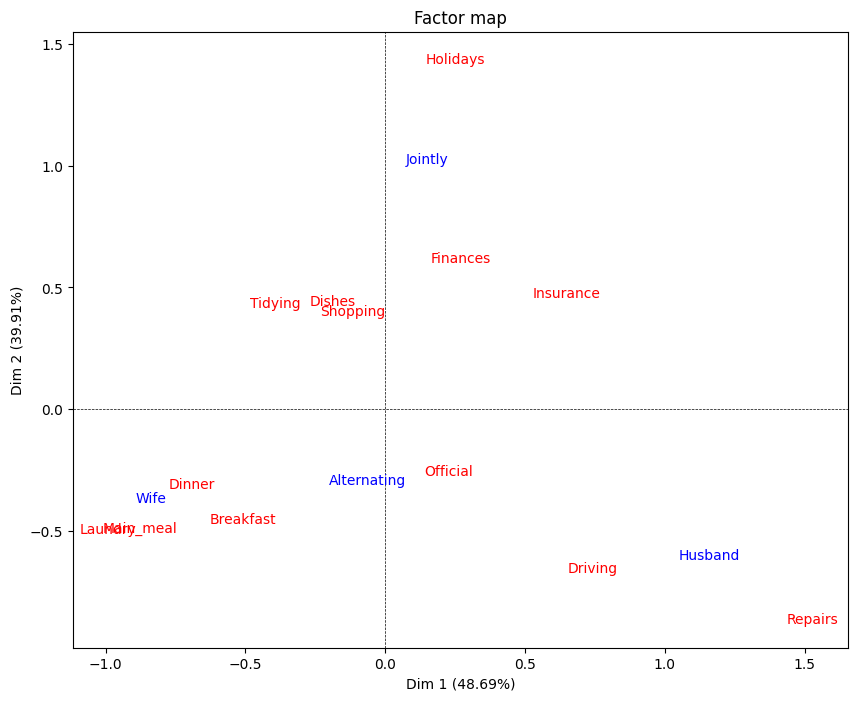

In [36]:
acs.mapping(num_x_axis=1, num_y_axis=2, figsize=(10, 8))

Es importante destacar que se pueden visualizar por separado haciendo uso de los métodos `acs.mapping_row` y `acs.mapping_col` para perfiles fila y perfiles columna, respectivamente.